In [22]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

In [23]:
df = pd.read_csv(r"C:\Users\USER\Documents\DS12\my_project\cilmate\Vicosa_Clean.csv")

In [24]:
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,city,medication_date,total_daily_rainfall_aut_mm,daily_average_atmospheric_pressure_aut_m_b,average_daily_dew_point_temp_c,max_daily_temp_c,average_daily_temp_c,min_daily_temp_c,average_daily_air_relative_humidity_aut,minimum_daily_air_humidity_aut,wind_max_daily_gust_ms,wind_average_daily_speed_ms,x
0,1,Vicosa,14/09/2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",,,,,,,,"
1,2,Vicosa,15/09/2005,NaN,940.825000,13.950000,24.4,NaN,NaN,69.500000,50.0,4.8,0.725000,",,,,,,,,"
2,3,Vicosa,16/09/2005,NaN,939.450000,14.731818,29.4,21.377273,14.4,68.272727,40.0,7.1,1.413636,",,,,,,,,"
3,4,Vicosa,17/09/2005,NaN,938.220000,16.345000,27.5,NaN,16.8,72.650000,49.0,5.3,0.970000,",,,,,,,,"
4,5,Vicosa,18/09/2005,2.0,939.513043,16.043478,21.0,18.308696,17.0,86.782609,79.0,3.8,0.604348,",,,,,,,,"


In [25]:
df.describe(include = "all")

,Unnamed: 0,city,medication_date,total_daily_rainfall_aut_mm,daily_average_atmospheric_pressure_aut_m_b,average_daily_dew_point_temp_c,max_daily_temp_c,average_daily_temp_c,min_daily_temp_c,average_daily_air_relative_humidity_aut,minimum_daily_air_humidity_aut,wind_max_daily_gust_ms,wind_average_daily_speed_ms,x
count,5223.000000,5223,5223,4967.000000,5137.000000,5135.000000,5134.000000,5000.000000,5135.000000,5136.000000,5132.000000,5131.000000,5135.000000,5223
unique,NaN,1,5223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,Vicosa,16/03/2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,",,,,,,,,"
freq,NaN,5223,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5223
mean,2612.000000,NaN,NaN,3.561466,937.290195,15.606983,26.676315,19.868885,15.379688,78.836256,50.072681,6.941084,0.862623,NaN
std,1507.894559,NaN,NaN,10.305327,3.344695,2.989553,3.504018,2.870965,3.564066,7.647841,13.345359,2.168912,0.428211,NaN
min,1.000000,NaN,NaN,0.000000,926.237500,5.354167,12.500000,11.358333,3.000000,37.000000,9.000000,1.200000,0.000000,NaN
25%,1306.500000,NaN,NaN,0.000000,935.012500,13.400000,24.300000,17.590625,12.900000,74.078125,41.000000,5.400000,0.544466,NaN
50%,2612.000000,NaN,NaN,0.000000,936.958333,16.166667,26.800000,20.247916,16.200000,79.475972,49.000000,6.700000,0.787500,NaN
75%,3917.500000,NaN,NaN,0.600000,939.570833,18.008333,29.200000,22.233333,18.200000,84.177083,58.000000,8.100000,1.112500,NaN


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5223 entries, 0 to 5222
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Unnamed: 0                                  5223 non-null   int64  
 1   city                                        5223 non-null   object 
 2   medication_date                             5223 non-null   object 
 3   total_daily_rainfall_aut_mm                 4967 non-null   float64
 4   daily_average_atmospheric_pressure_aut_m_b  5137 non-null   float64
 5   average_daily_dew_point_temp_c              5135 non-null   float64
 6   max_daily_temp_c                            5134 non-null   float64
 7   average_daily_temp_c                        5000 non-null   float64
 8   min_daily_temp_c                            5135 non-null   float64
 9   average_daily_air_relative_humidity_aut     5136 non-null   float64
 10  minimum_dail

In [27]:
df.drop(columns=['Unnamed: 0', 'x'], inplace = True)

In [29]:
#import sweetviz as sv
#report = sv.analyze(df)
#report.show_html('Vicosa_report.html')

In [30]:
corrMatrix = df.corr(method = 'spearman')
corrMatrix.style.background_gradient(cmap='coolwarm')

,total_daily_rainfall_aut_mm,daily_average_atmospheric_pressure_aut_m_b,average_daily_dew_point_temp_c,max_daily_temp_c,average_daily_temp_c,min_daily_temp_c,average_daily_air_relative_humidity_aut,minimum_daily_air_humidity_aut,wind_max_daily_gust_ms,wind_average_daily_speed_ms
total_daily_rainfall_aut_mm,1.000000,-0.295434,0.369402,-0.167638,0.049294,0.303874,0.498802,0.440373,-0.081427,-0.097661
daily_average_atmospheric_pressure_aut_m_b,-0.295434,1.000000,-0.700678,-0.471654,-0.683105,-0.692709,-0.061568,-0.132955,-0.302370,-0.353991
average_daily_dew_point_temp_c,0.369402,-0.700678,1.000000,0.440310,0.789428,0.927768,0.328755,0.385637,0.100901,0.140682
max_daily_temp_c,-0.167638,-0.471654,0.440310,1.000000,0.829069,0.454923,-0.544001,-0.582157,0.375643,0.371499
average_daily_temp_c,0.049294,-0.683105,0.789428,0.829069,1.000000,0.838342,-0.261341,-0.152463,0.321211,0.400749
min_daily_temp_c,0.303874,-0.692709,0.927768,0.454923,0.838342,1.000000,0.154088,0.296176,0.162495,0.250000
average_daily_air_relative_humidity_aut,0.498802,-0.061568,0.328755,-0.544001,-0.261341,0.154088,1.000000,0.856372,-0.335942,-0.411237
minimum_daily_air_humidity_aut,0.440373,-0.132955,0.385637,-0.582157,-0.152463,0.296176,0.856372,1.000000,-0.271890,-0.231258
wind_max_daily_gust_ms,-0.081427,-0.302370,0.100901,0.375643,0.321211,0.162495,-0.335942,-0.271890,1.000000,0.801345
wind_average_daily_speed_ms,-0.097661,-0.353991,0.140682,0.371499,0.400749,0.250000,-0.411237,-0.231258,0.801345,1.000000


#### Turn "medication_date" to Date

In [31]:
df['Date'] = df["medication_date"]
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, infer_datetime_format=True)
df['year'] = df['Date'].dt.year
df["month"] = df['Date'].dt.month
df['week'] = df['Date'].dt.isocalendar().week
df.tail(10)

,city,medication_date,total_daily_rainfall_aut_mm,daily_average_atmospheric_pressure_aut_m_b,average_daily_dew_point_temp_c,max_daily_temp_c,average_daily_temp_c,min_daily_temp_c,average_daily_air_relative_humidity_aut,minimum_daily_air_humidity_aut,wind_max_daily_gust_ms,wind_average_daily_speed_ms,Date,year,month,week
5213,Vicosa,23/12/2019,33.8,935.241667,19.270833,26.0,21.512500,19.2,87.583333,65.0,7.6,0.966667,2019-12-23,2019,12,52
5214,Vicosa,24/12/2019,1.2,935.362500,19.083333,23.1,20.541667,18.6,91.500000,81.0,7.1,0.383333,2019-12-24,2019,12,52
5215,Vicosa,25/12/2019,6.0,935.541667,18.179167,29.2,22.325000,18.0,79.958333,47.0,6.5,0.612500,2019-12-25,2019,12,52
5216,Vicosa,26/12/2019,0.0,936.437500,18.491667,30.9,23.437500,18.5,76.541667,41.0,6.3,0.716667,2019-12-26,2019,12,52
5217,Vicosa,27/12/2019,0.0,937.250000,18.291667,29.6,23.120833,18.5,76.541667,46.0,5.8,0.929167,2019-12-27,2019,12,52
5218,Vicosa,28/12/2019,0.0,936.537500,18.654167,29.7,23.020833,19.7,78.250000,46.0,5.9,0.583333,2019-12-28,2019,12,52
5219,Vicosa,29/12/2019,0.0,935.212500,17.670833,30.3,22.800000,18.2,75.500000,45.0,5.8,0.587500,2019-12-29,2019,12,52
5220,Vicosa,30/12/2019,0.0,933.491667,17.220833,30.1,21.116667,16.8,80.875000,44.0,6.1,0.620833,2019-12-30,2019,12,1
5221,Vicosa,31/12/2019,4.0,932.916667,17.983333,29.2,21.937500,17.2,80.458333,47.0,6.1,0.675000,2019-12-31,2019,12,1
5222,Vicosa,01/01/2020,0.2,931.700000,18.704167,30.8,23.425000,18.4,76.708333,47.0,8.0,1.270833,2020-01-01,2020,1,1


### Testing for Outliers

In [33]:
col_names = list(df.columns)
col_names

['city',
 'medication_date',
 'total_daily_rainfall_aut_mm',
 'daily_average_atmospheric_pressure_aut_m_b',
 'average_daily_dew_point_temp_c',
 'max_daily_temp_c',
 'average_daily_temp_c',
 'min_daily_temp_c',
 'average_daily_air_relative_humidity_aut',
 'minimum_daily_air_humidity_aut',
 'wind_max_daily_gust_ms',
 'wind_average_daily_speed_ms',
 'Date',
 'year',
 'month',
 'week']

<AxesSubplot:xlabel='wind_average_daily_speed_ms'>

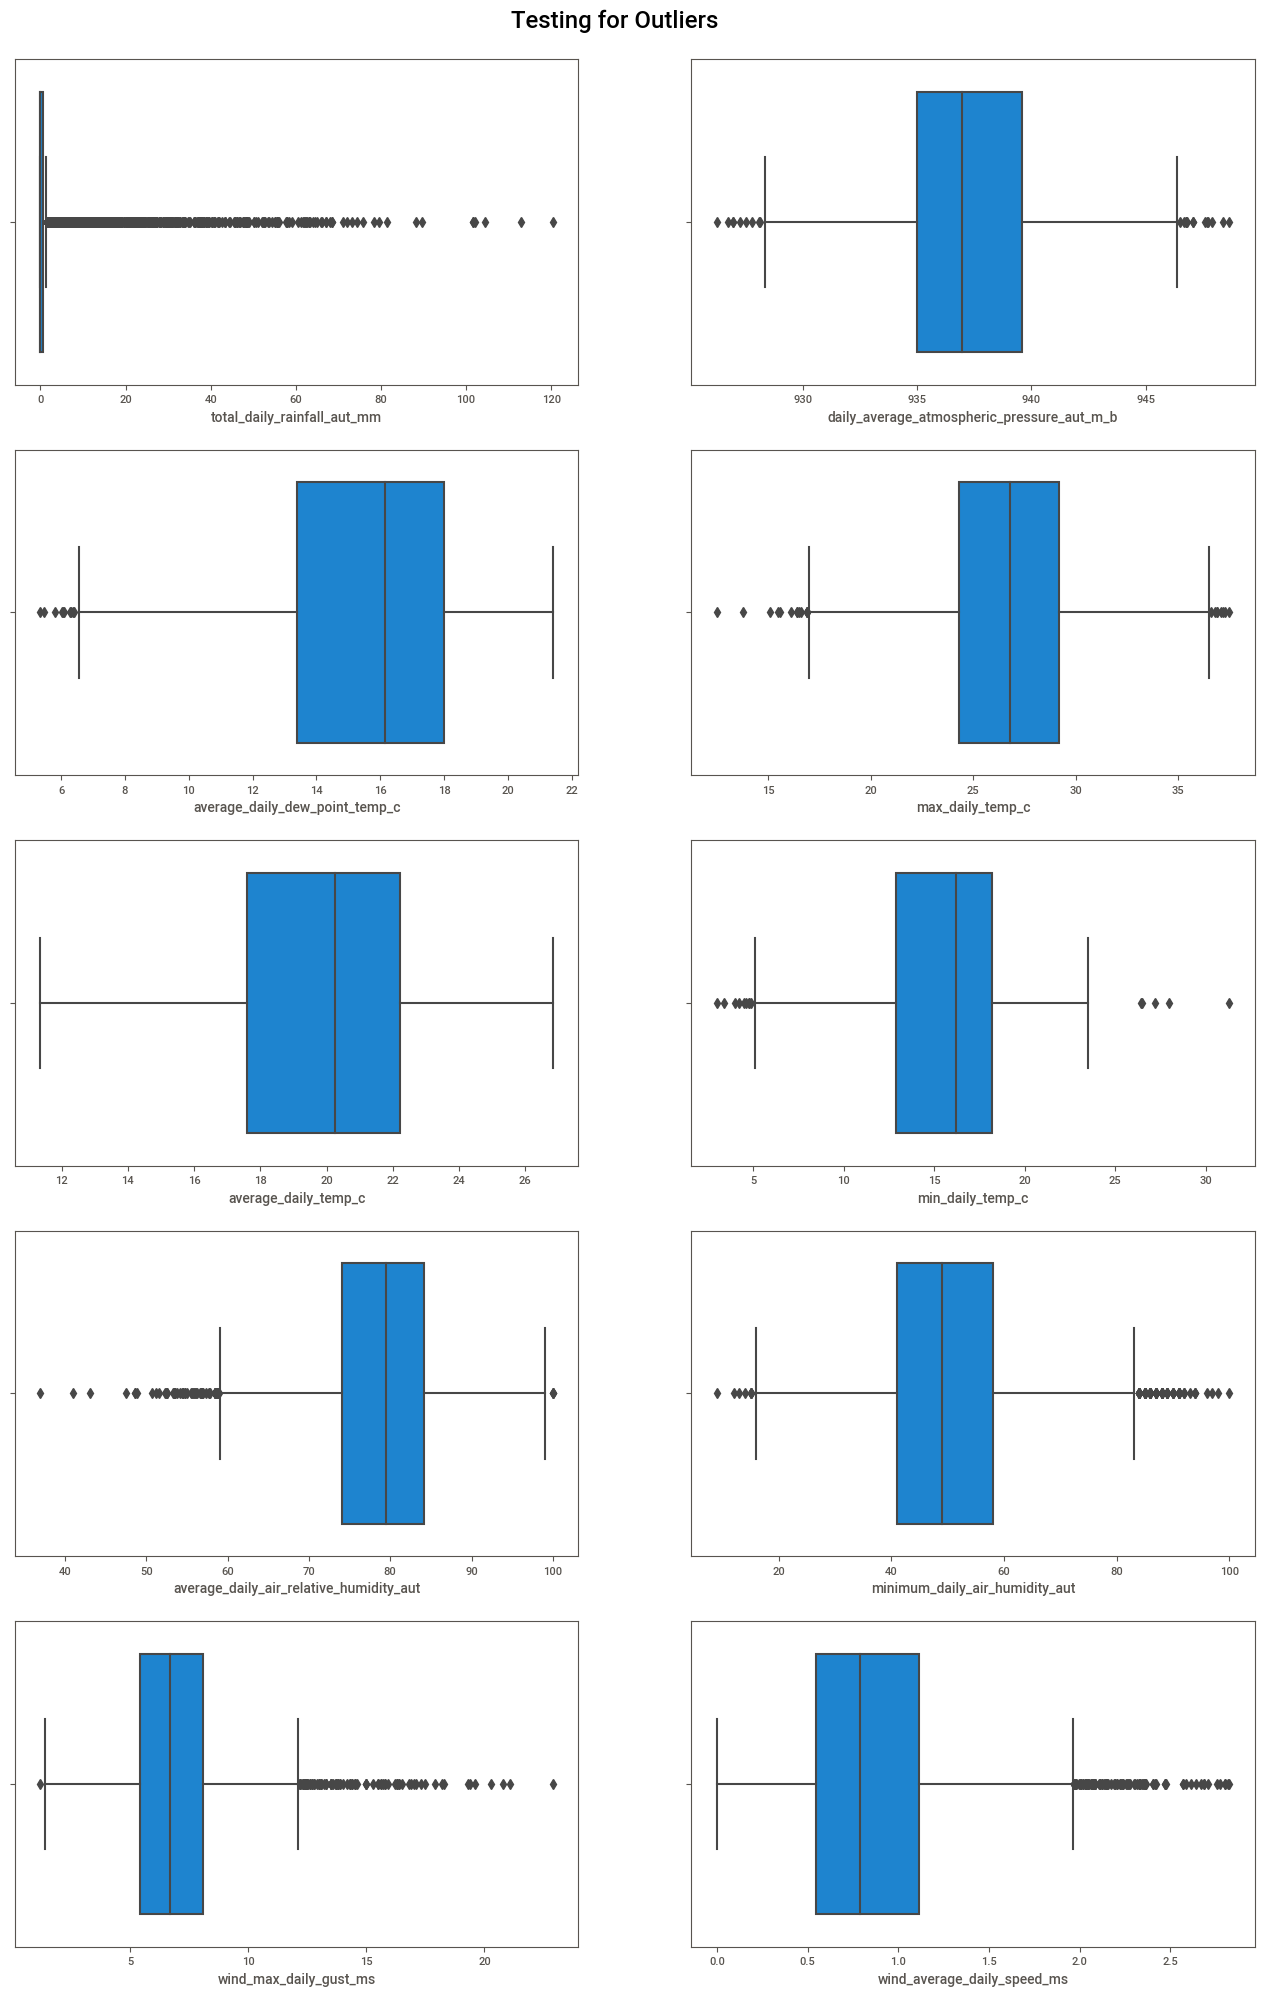

In [34]:
fig, axes = plt.subplots(5,2, figsize=(16,25))
fig.suptitle('Testing for Outliers', y= 0.9, fontsize =  'xx-large')
sns.boxplot(ax=axes[0, 0], x='total_daily_rainfall_aut_mm', data = df)
sns.boxplot(ax=axes[0, 1], x='daily_average_atmospheric_pressure_aut_m_b', data = df)
sns.boxplot(ax=axes[1, 0], x='average_daily_dew_point_temp_c', data = df)
sns.boxplot(ax=axes[1, 1], x='max_daily_temp_c', data = df)
sns.boxplot(ax=axes[2, 0], x='average_daily_temp_c', data = df)
sns.boxplot(ax=axes[2, 1], x='min_daily_temp_c', data = df)
sns.boxplot(ax=axes[3, 0], x='average_daily_air_relative_humidity_aut', data = df)
sns.boxplot(ax=axes[3, 1], x='minimum_daily_air_humidity_aut', data = df)
sns.boxplot(ax=axes[4, 0], x='wind_max_daily_gust_ms',  data = df)
sns.boxplot(ax=axes[4, 1], x='wind_average_daily_speed_ms', data = df)

<AxesSubplot:xlabel='year', ylabel='total_daily_rainfall_aut_mm'>

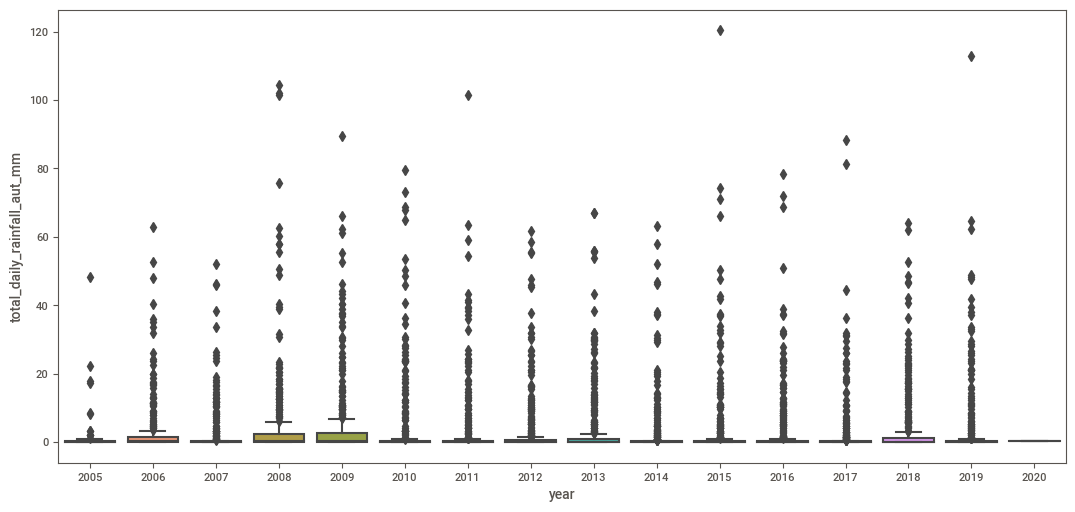

In [35]:
plt.figure(figsize=(13, 6))
sns.boxplot(y='total_daily_rainfall_aut_mm', x= 'year', data = df)

<AxesSubplot:xlabel='year', ylabel='min_daily_temp_c'>

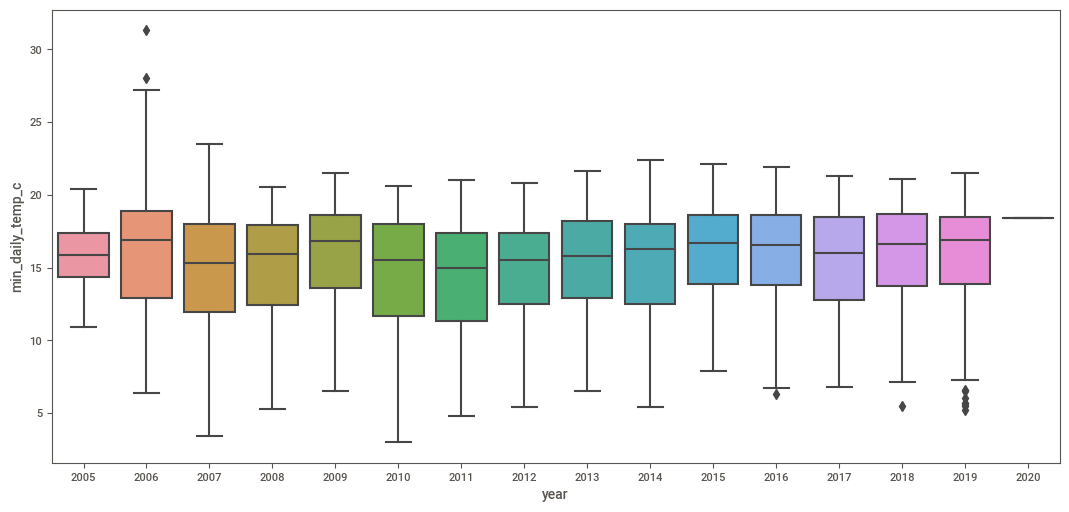

In [36]:
plt.figure(figsize=(13, 6))
sns.boxplot(y='min_daily_temp_c', x= 'year', data = df)

<AxesSubplot:xlabel='year', ylabel='max_daily_temp_c'>

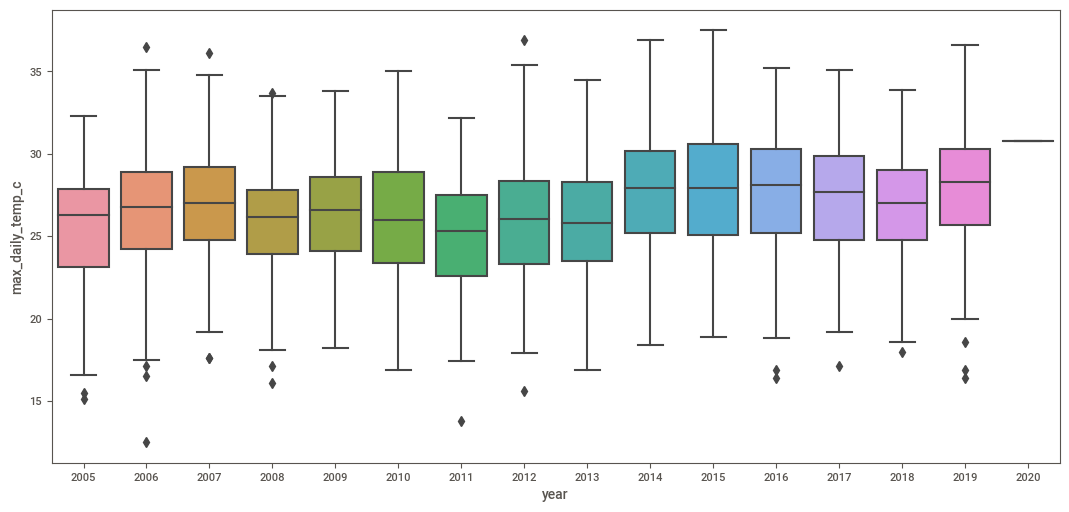

In [37]:
plt.figure(figsize=(13, 6))
sns.boxplot(y='max_daily_temp_c', x= 'year', data = df)

<AxesSubplot:xlabel='year', ylabel='average_daily_dew_point_temp_c'>

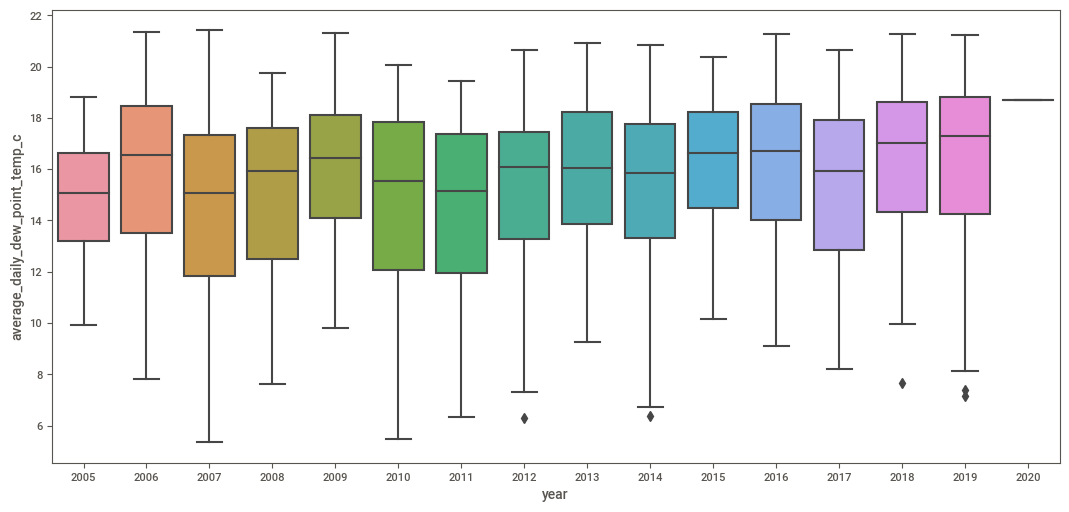

In [38]:
plt.figure(figsize=(13, 6))
sns.boxplot(y='average_daily_dew_point_temp_c', x= 'year', data = df)

<AxesSubplot:xlabel='year', ylabel='wind_average_daily_speed_ms'>

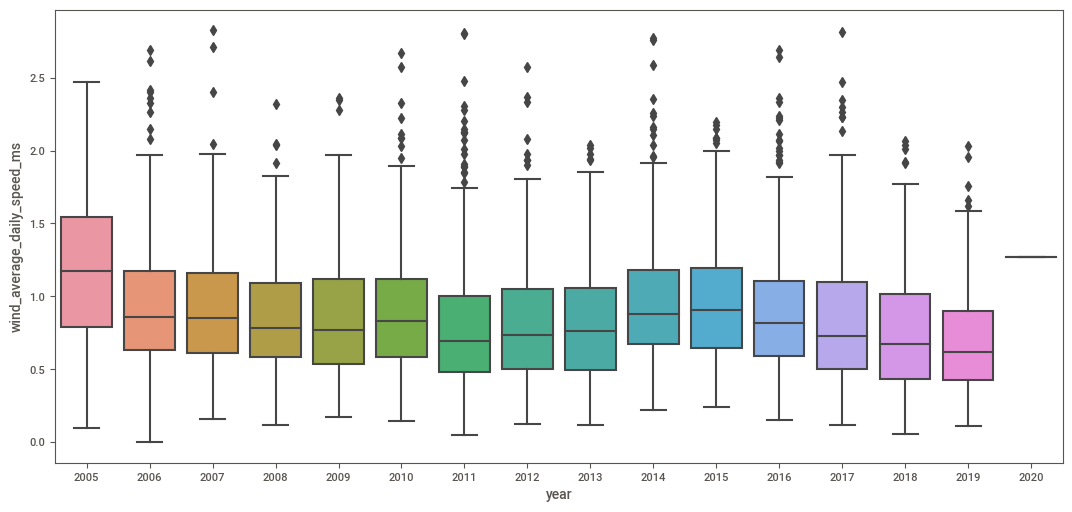

In [39]:
plt.figure(figsize=(13, 6))
sns.boxplot(y='wind_average_daily_speed_ms', x= 'year', data = df)

### Missing values 

In [28]:
df.isnull().sum()

city                                            0
medication_date                                 0
total_daily_rainfall_aut_mm                   256
daily_average_atmospheric_pressure_aut_m_b     86
average_daily_dew_point_temp_c                 88
max_daily_temp_c                               89
average_daily_temp_c                          223
min_daily_temp_c                               88
average_daily_air_relative_humidity_aut        87
minimum_daily_air_humidity_aut                 91
wind_max_daily_gust_ms                         92
wind_average_daily_speed_ms                    88
dtype: int64

Nulls range 1.6% - 4.9%

In [40]:
df_nulls = df.copy()

#set date as index
df_nulls = df_nulls.set_index('Date')

columns = list(df_nulls.columns)

for col in columns:
    new_col_name = col+"_nulls"
    df_nulls[new_col_name] = 0
    df_nulls.loc[(df_nulls[col].isnull()),[new_col_name]] = 1

df_nulls2 = df_nulls.copy()   

df_nulls.drop(columns=columns, inplace=True)

    
df_nulls.head() 

,city_nulls,medication_date_nulls,total_daily_rainfall_aut_mm_nulls,daily_average_atmospheric_pressure_aut_m_b_nulls,average_daily_dew_point_temp_c_nulls,max_daily_temp_c_nulls,average_daily_temp_c_nulls,min_daily_temp_c_nulls,average_daily_air_relative_humidity_aut_nulls,minimum_daily_air_humidity_aut_nulls,wind_max_daily_gust_ms_nulls,wind_average_daily_speed_ms_nulls,year_nulls,month_nulls,week_nulls
Date,,,,,,,,,,,,,,,
2005-09-14,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0
2005-09-15,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0
2005-09-16,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2005-09-17,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2005-09-18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:ylabel='Date'>

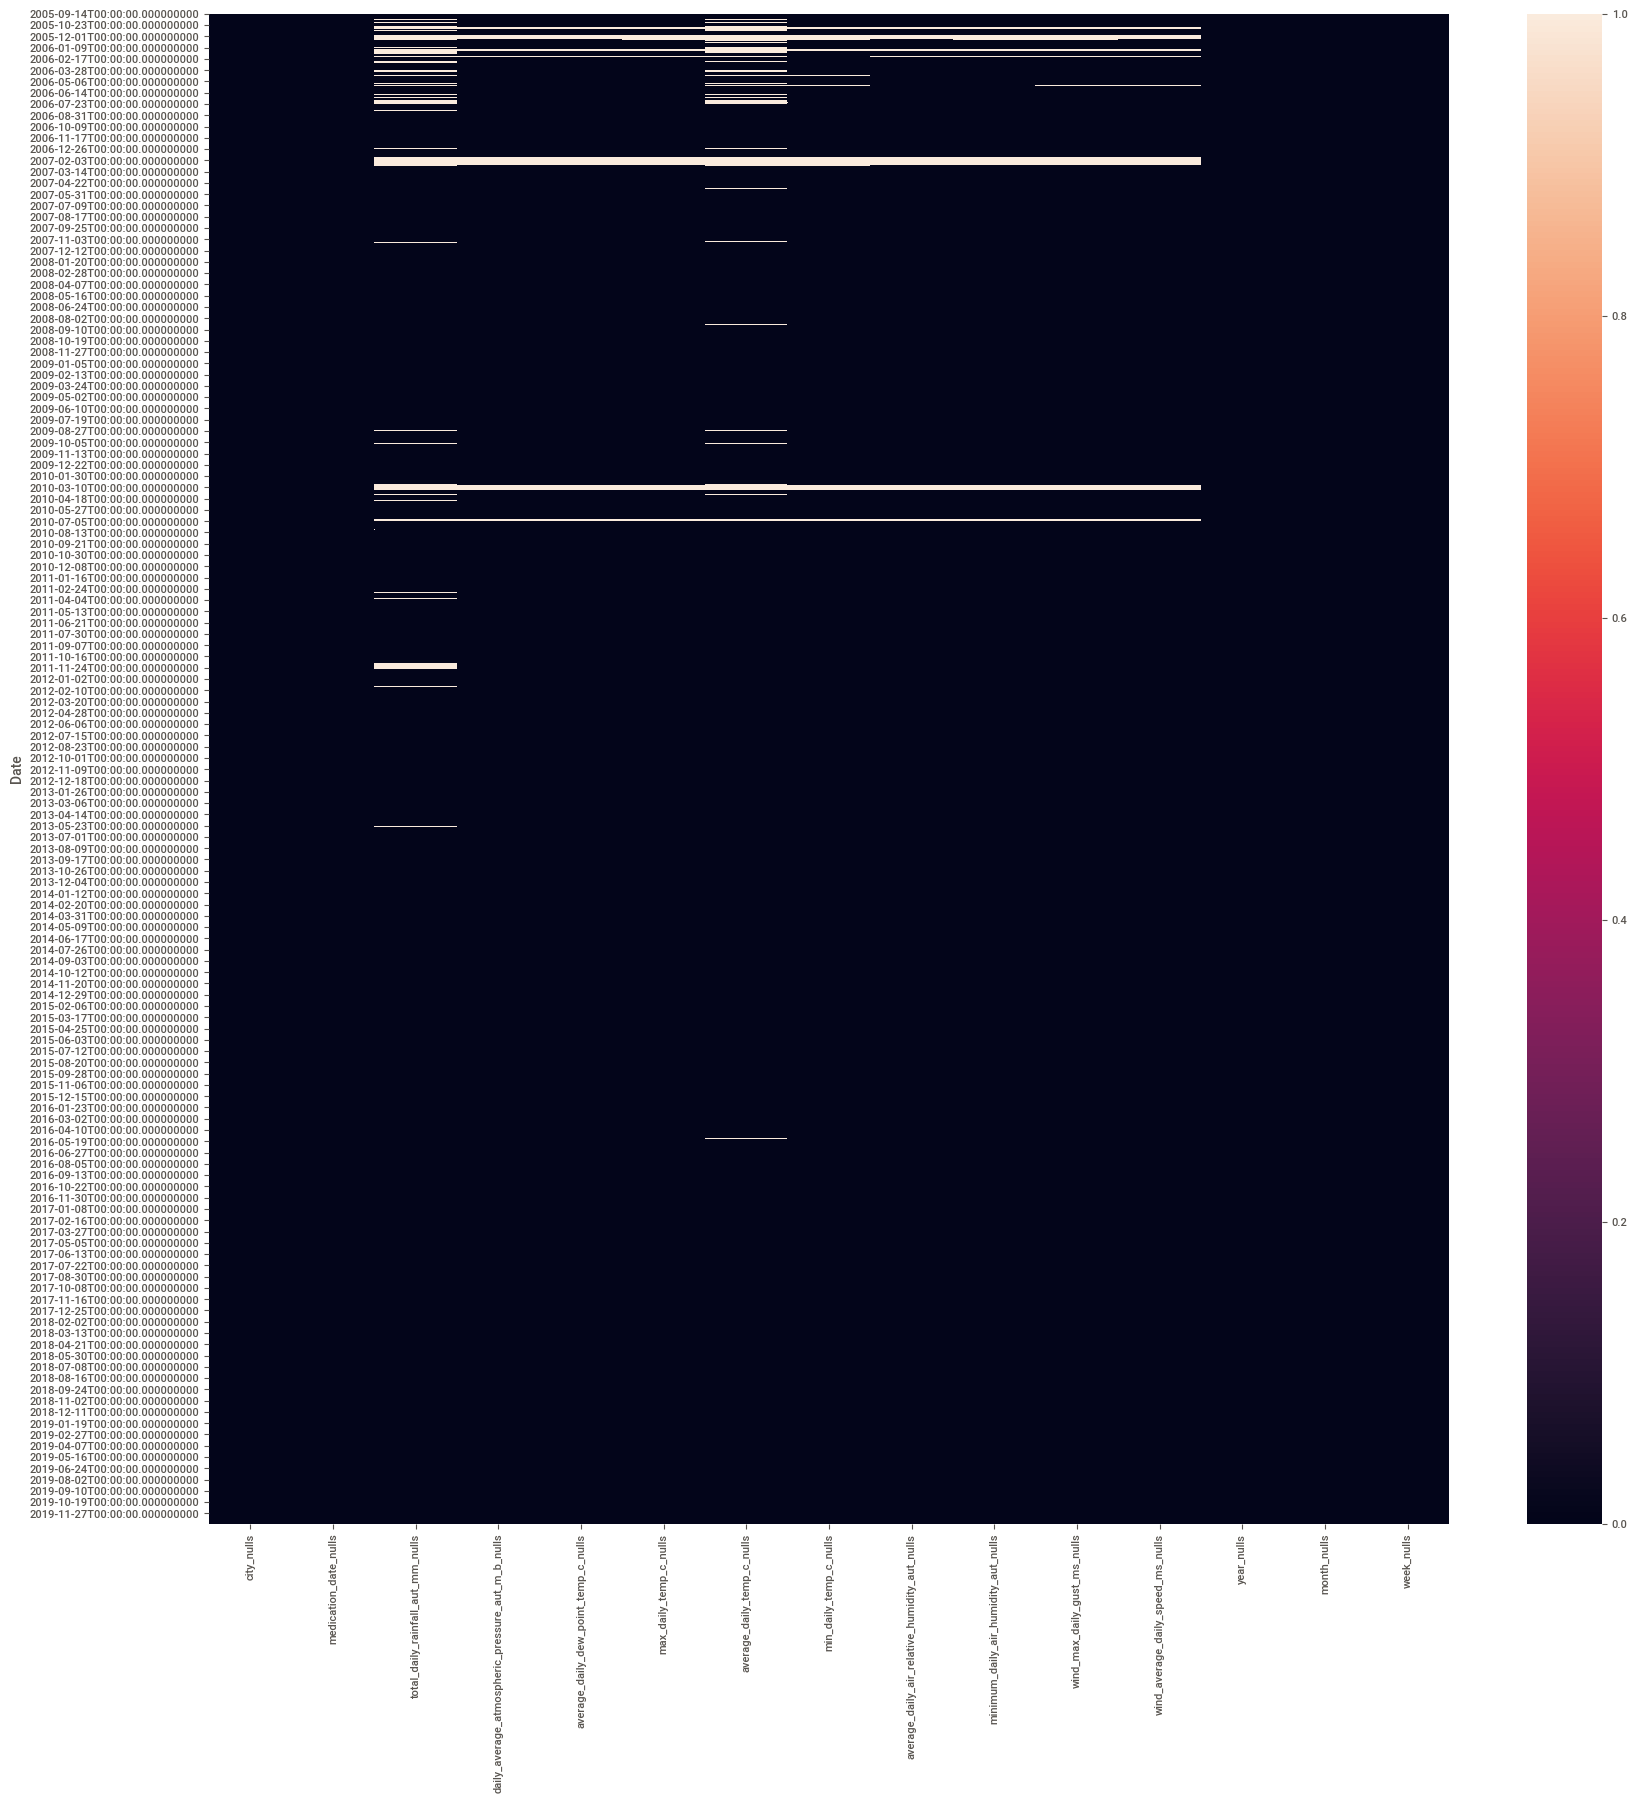

In [41]:
plt.figure(figsize=(20,20))
sns.heatmap(df_nulls)

Most missing values are before 2012, therefore will not affect the model.
<br>Missing Mechanism appears to be MCAR, (probably due to equipment malfunction)

-----------------------------
### Missing values treatment:
1. Use 'ffill' and 'bfill' in for when 1-2 rows missing
2. Drop rows where all climate data is missing
3. Use KNN to fill the remaining nulls

In [11]:
col_list = ['total_daily_rainfall_aut_mm',
       'daily_average_atmospheric_pressure_aut_m_b',
       'average_daily_dew_point_temp_c', 'max_daily_temp_c',
       'average_daily_temp_c', 'min_daily_temp_c',
       'average_daily_air_relative_humidity_aut',
       'minimum_daily_air_humidity_aut', 'wind_max_daily_gust_ms',
       'wind_average_daily_speed_ms']

In [12]:
df_clean = df.copy()

# fillna for single rows
df_clean.fillna(method = 'ffill', limit = 1, inplace = True)
df_clean.fillna(method = 'bfill', limit = 1, inplace = True)
df_clean.isnull().sum()

city                                            0
medication_date                                 0
total_daily_rainfall_aut_mm                   151
daily_average_atmospheric_pressure_aut_m_b     59
average_daily_dew_point_temp_c                 62
max_daily_temp_c                               61
average_daily_temp_c                          129
min_daily_temp_c                               60
average_daily_air_relative_humidity_aut        62
minimum_daily_air_humidity_aut                 64
wind_max_daily_gust_ms                         62
wind_average_daily_speed_ms                    59
Date                                            0
year                                            0
month                                           0
week                                            0
dtype: int64

In [13]:
#drop rows

df_clean.dropna(how= 'all', subset = col_list, inplace = True)
df_clean.isnull().sum()

city                                           0
medication_date                                0
total_daily_rainfall_aut_mm                   98
daily_average_atmospheric_pressure_aut_m_b     6
average_daily_dew_point_temp_c                 9
max_daily_temp_c                               8
average_daily_temp_c                          76
min_daily_temp_c                               7
average_daily_air_relative_humidity_aut        9
minimum_daily_air_humidity_aut                11
wind_max_daily_gust_ms                         9
wind_average_daily_speed_ms                    6
Date                                           0
year                                           0
month                                          0
week                                           0
dtype: int64

<AxesSubplot:>

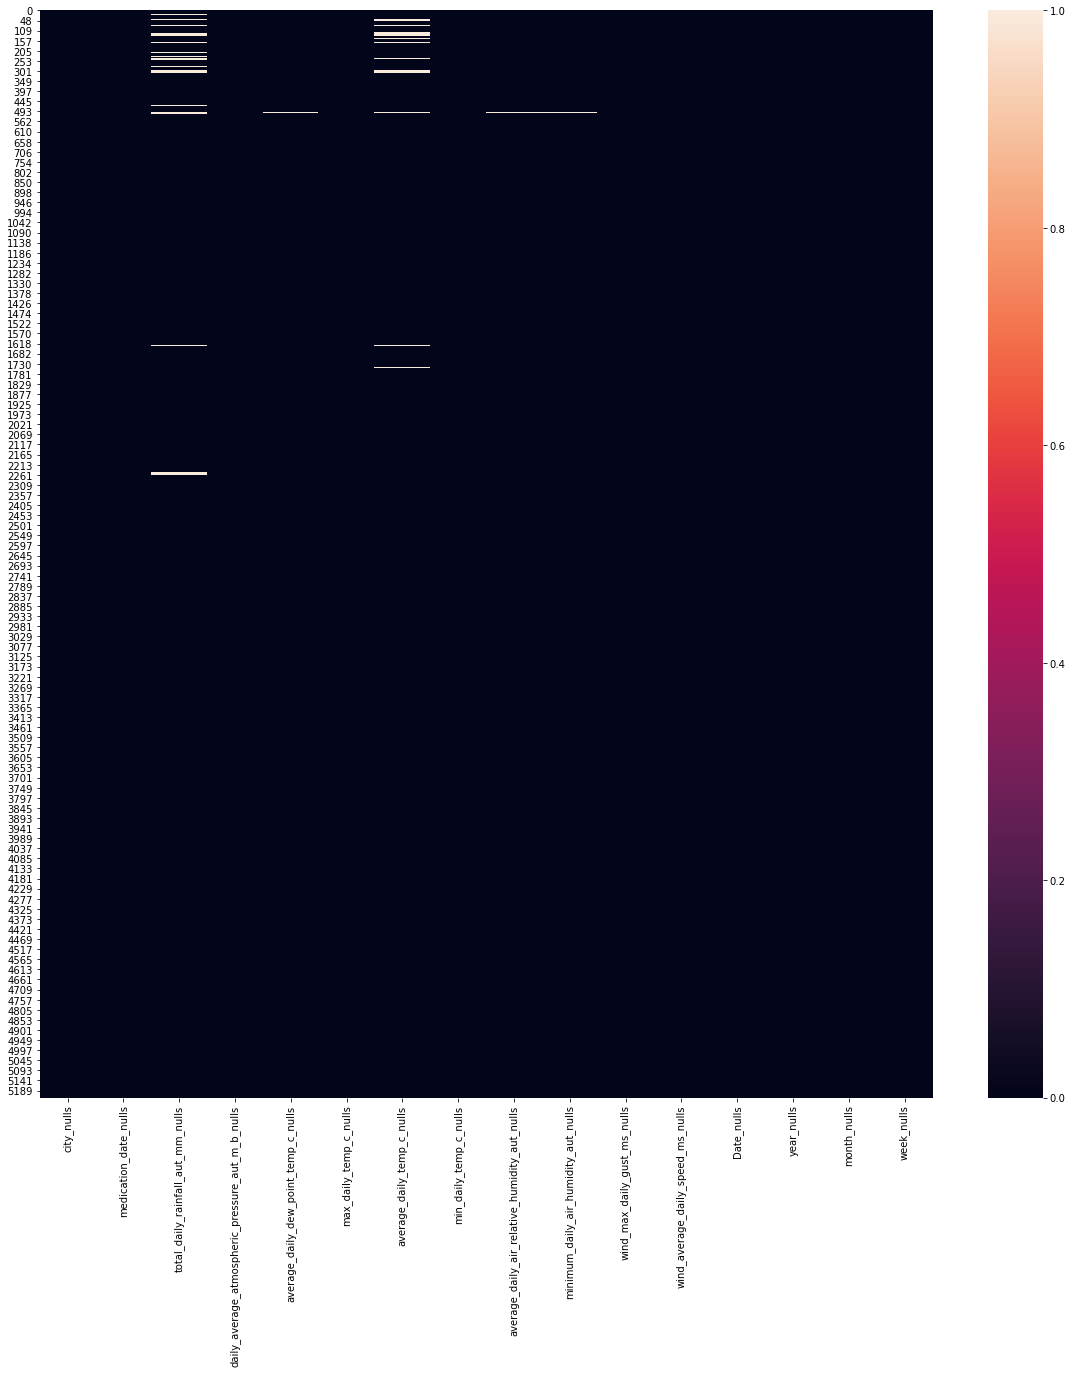

In [14]:
columns = list(df_clean.columns)
df_copy2 = df_clean.copy()

for col in df.columns:
    new_col_name = col+"_nulls"
    df_copy2[new_col_name] = 0
    df_copy2.loc[(df_copy2[col].isnull()),[new_col_name]] = 1
    
df_copy2.drop(columns=columns, inplace=True)
    
plt.figure(figsize=(20,20))
sns.heatmap(df_copy2)

In [15]:
imputer = KNNImputer(copy = False)
df_clean[col_list] = imputer.fit_transform(df_clean[col_list])


df_clean.isnull().sum()

city                                          0
medication_date                               0
total_daily_rainfall_aut_mm                   0
daily_average_atmospheric_pressure_aut_m_b    0
average_daily_dew_point_temp_c                0
max_daily_temp_c                              0
average_daily_temp_c                          0
min_daily_temp_c                              0
average_daily_air_relative_humidity_aut       0
minimum_daily_air_humidity_aut                0
wind_max_daily_gust_ms                        0
wind_average_daily_speed_ms                   0
Date                                          0
year                                          0
month                                         0
week                                          0
dtype: int64

<AxesSubplot:>

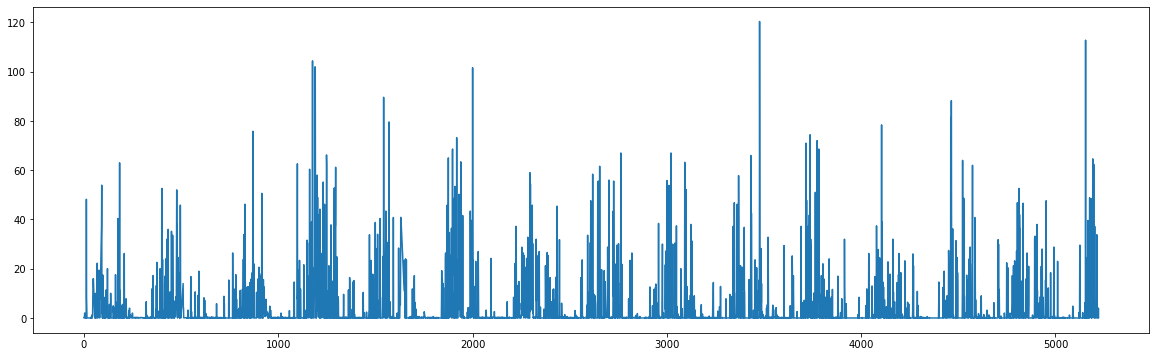

In [16]:
df_clean['total_daily_rainfall_aut_mm'].plot(figsize=(20,6))

Keep only rows with relevent dates. i.e. drop all rows with year < 2012

In [17]:
df_clean.drop(df_clean[df_clean['year'] < 2012].index, inplace = True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2923 entries, 2300 to 5222
Data columns (total 16 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   city                                        2923 non-null   object        
 1   medication_date                             2923 non-null   object        
 2   total_daily_rainfall_aut_mm                 2923 non-null   float64       
 3   daily_average_atmospheric_pressure_aut_m_b  2923 non-null   float64       
 4   average_daily_dew_point_temp_c              2923 non-null   float64       
 5   max_daily_temp_c                            2923 non-null   float64       
 6   average_daily_temp_c                        2923 non-null   float64       
 7   min_daily_temp_c                            2923 non-null   float64       
 8   average_daily_air_relative_humidity_aut     2923 non-null   float64       
 9   minim

In [18]:
#fix problem of the number of last week of the year 

df_clean.loc[(df_clean['week'] == 1) & (df_clean['month'] == 12), 'year'] = df_clean['year'] +1
df_clean.loc[(df_clean['week'] >= 52) & (df_clean['month'] == 1), 'year'] = df_clean['year'] -1
df_clean.tail(10)

,city,medication_date,total_daily_rainfall_aut_mm,daily_average_atmospheric_pressure_aut_m_b,average_daily_dew_point_temp_c,max_daily_temp_c,average_daily_temp_c,min_daily_temp_c,average_daily_air_relative_humidity_aut,minimum_daily_air_humidity_aut,wind_max_daily_gust_ms,wind_average_daily_speed_ms,Date,year,month,week
5213,Vicosa,23/12/2019,33.8,935.241667,19.270833,26.0,21.512500,19.2,87.583333,65.0,7.6,0.966667,2019-12-23,2019,12,52
5214,Vicosa,24/12/2019,1.2,935.362500,19.083333,23.1,20.541667,18.6,91.500000,81.0,7.1,0.383333,2019-12-24,2019,12,52
5215,Vicosa,25/12/2019,6.0,935.541667,18.179167,29.2,22.325000,18.0,79.958333,47.0,6.5,0.612500,2019-12-25,2019,12,52
5216,Vicosa,26/12/2019,0.0,936.437500,18.491667,30.9,23.437500,18.5,76.541667,41.0,6.3,0.716667,2019-12-26,2019,12,52
5217,Vicosa,27/12/2019,0.0,937.250000,18.291667,29.6,23.120833,18.5,76.541667,46.0,5.8,0.929167,2019-12-27,2019,12,52
5218,Vicosa,28/12/2019,0.0,936.537500,18.654167,29.7,23.020833,19.7,78.250000,46.0,5.9,0.583333,2019-12-28,2019,12,52
5219,Vicosa,29/12/2019,0.0,935.212500,17.670833,30.3,22.800000,18.2,75.500000,45.0,5.8,0.587500,2019-12-29,2019,12,52
5220,Vicosa,30/12/2019,0.0,933.491667,17.220833,30.1,21.116667,16.8,80.875000,44.0,6.1,0.620833,2019-12-30,2020,12,1
5221,Vicosa,31/12/2019,4.0,932.916667,17.983333,29.2,21.937500,17.2,80.458333,47.0,6.1,0.675000,2019-12-31,2020,12,1
5222,Vicosa,01/01/2020,0.2,931.700000,18.704167,30.8,23.425000,18.4,76.708333,47.0,8.0,1.270833,2020-01-01,2020,1,1


In [19]:
df_clean.head()

,city,medication_date,total_daily_rainfall_aut_mm,daily_average_atmospheric_pressure_aut_m_b,average_daily_dew_point_temp_c,max_daily_temp_c,average_daily_temp_c,min_daily_temp_c,average_daily_air_relative_humidity_aut,minimum_daily_air_humidity_aut,wind_max_daily_gust_ms,wind_average_daily_speed_ms,Date,year,month,week
2300,Vicosa,01/01/2012,22.4,930.583333,19.012500,22.6,20.545833,19.1,91.000000,81.0,10.0,2.079167,2012-01-01,2011,1,52
2301,Vicosa,02/01/2012,21.0,929.625000,18.366667,20.3,19.120833,18.8,95.291667,92.0,13.5,1.195833,2012-01-02,2012,1,1
2302,Vicosa,03/01/2012,37.8,932.141667,18.412500,24.1,20.012500,17.4,90.875000,72.0,6.2,0.658333,2012-01-03,2012,1,1
2303,Vicosa,04/01/2012,20.6,934.866667,17.566667,26.5,19.512500,16.7,89.166667,59.0,6.5,0.583333,2012-01-04,2012,1,1
2304,Vicosa,05/01/2012,9.6,935.979167,16.262500,27.4,19.037500,14.4,85.666667,50.0,6.1,0.695833,2012-01-05,2012,1,1


In [20]:
# make column of 'week of the year' in format yyyyww

df_clean['week'] = df_clean['week'].astype('str').str.pad(width=2, side='left', fillchar='0')
df_clean["weekofyear"] = df_clean['year'].astype('str') + df_clean['week'].astype('str')
df_clean.tail(10)

,city,medication_date,total_daily_rainfall_aut_mm,daily_average_atmospheric_pressure_aut_m_b,average_daily_dew_point_temp_c,max_daily_temp_c,average_daily_temp_c,min_daily_temp_c,average_daily_air_relative_humidity_aut,minimum_daily_air_humidity_aut,wind_max_daily_gust_ms,wind_average_daily_speed_ms,Date,year,month,week,weekofyear
5213,Vicosa,23/12/2019,33.8,935.241667,19.270833,26.0,21.512500,19.2,87.583333,65.0,7.6,0.966667,2019-12-23,2019,12,52,201952
5214,Vicosa,24/12/2019,1.2,935.362500,19.083333,23.1,20.541667,18.6,91.500000,81.0,7.1,0.383333,2019-12-24,2019,12,52,201952
5215,Vicosa,25/12/2019,6.0,935.541667,18.179167,29.2,22.325000,18.0,79.958333,47.0,6.5,0.612500,2019-12-25,2019,12,52,201952
5216,Vicosa,26/12/2019,0.0,936.437500,18.491667,30.9,23.437500,18.5,76.541667,41.0,6.3,0.716667,2019-12-26,2019,12,52,201952
5217,Vicosa,27/12/2019,0.0,937.250000,18.291667,29.6,23.120833,18.5,76.541667,46.0,5.8,0.929167,2019-12-27,2019,12,52,201952
5218,Vicosa,28/12/2019,0.0,936.537500,18.654167,29.7,23.020833,19.7,78.250000,46.0,5.9,0.583333,2019-12-28,2019,12,52,201952
5219,Vicosa,29/12/2019,0.0,935.212500,17.670833,30.3,22.800000,18.2,75.500000,45.0,5.8,0.587500,2019-12-29,2019,12,52,201952
5220,Vicosa,30/12/2019,0.0,933.491667,17.220833,30.1,21.116667,16.8,80.875000,44.0,6.1,0.620833,2019-12-30,2020,12,01,202001
5221,Vicosa,31/12/2019,4.0,932.916667,17.983333,29.2,21.937500,17.2,80.458333,47.0,6.1,0.675000,2019-12-31,2020,12,01,202001
5222,Vicosa,01/01/2020,0.2,931.700000,18.704167,30.8,23.425000,18.4,76.708333,47.0,8.0,1.270833,2020-01-01,2020,1,01,202001


In [21]:
df_clean.head()

,city,medication_date,total_daily_rainfall_aut_mm,daily_average_atmospheric_pressure_aut_m_b,average_daily_dew_point_temp_c,max_daily_temp_c,average_daily_temp_c,min_daily_temp_c,average_daily_air_relative_humidity_aut,minimum_daily_air_humidity_aut,wind_max_daily_gust_ms,wind_average_daily_speed_ms,Date,year,month,week,weekofyear
2300,Vicosa,01/01/2012,22.4,930.583333,19.012500,22.6,20.545833,19.1,91.000000,81.0,10.0,2.079167,2012-01-01,2011,1,52,201152
2301,Vicosa,02/01/2012,21.0,929.625000,18.366667,20.3,19.120833,18.8,95.291667,92.0,13.5,1.195833,2012-01-02,2012,1,01,201201
2302,Vicosa,03/01/2012,37.8,932.141667,18.412500,24.1,20.012500,17.4,90.875000,72.0,6.2,0.658333,2012-01-03,2012,1,01,201201
2303,Vicosa,04/01/2012,20.6,934.866667,17.566667,26.5,19.512500,16.7,89.166667,59.0,6.5,0.583333,2012-01-04,2012,1,01,201201
2304,Vicosa,05/01/2012,9.6,935.979167,16.262500,27.4,19.037500,14.4,85.666667,50.0,6.1,0.695833,2012-01-05,2012,1,01,201201


In [22]:
df_clean.to_csv('Vicosa_climate_KNN.csv', index=False)